#InternSavy Data Science

##Task -1

## About Task-1

#### Usage of Classification Algorithm for prediction of Graduate Admissions from an Indian Perspective


### Dataset

#### This dataset is created for prediction of Graduate Admissions from an Indian perspective by Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

### Data Discription
 GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

**Exploratory Data Analysis**

In [ ]:
# Importing of necessary libraries
import pandas as pd
# Used for data manipulation ,analysis and cleaning
import numpy as np
# Used for performing numerical operations in data
import matplotlib.pyplot as plt
# Used for creating visualizations and plots
import seaborn as sns
# Used for creating Statiscal graphics ,based on Matplotlib library
%matplotlib inline
# Used for displaying outputs of the plots in the same window

In [ ]:
# Conversion of dataset into dataframe
adm=pd.read_csv("/content/Admission_Predict.csv")
# I have already downloaded the required csv files and uploaded it in Google colab

In [ ]:
adm.info()
# Provides a concise summary of the Dataframe
# It includes the Memory usage,datatype etc info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
adm.shape
# Provides the total number of rows and columns of dataframe

(400, 9)

 This dataframe contains 400 records and 9 columns

In [ ]:
adm.describe()
# For finding statiscal or discriptive or summary statistical information

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
numerics=['int16','int32','int64','float16','float32','float64']
num_col=adm.select_dtypes(include=numerics)
num_col
# For finding only numerical attributes

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
len(num_col.columns)

9

In [ ]:
adm.head
# Displays the first five records

<bound method NDFrame.head of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance

In [ ]:
adm.tail
# Displays the last 5 records

<bound method NDFrame.tail of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance

In [ ]:
adm.columns
# Displays the total columns present in the dataframe

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## Outlier Detection

<Axes: >

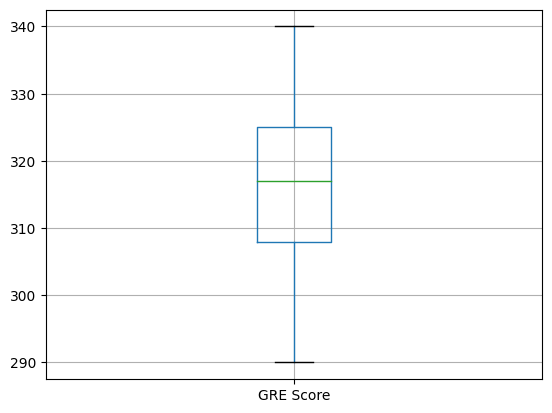

In [ ]:
# Finding if there are any outliers in GRE Score
adm.boxplot(column=['GRE Score'])

<Axes: >

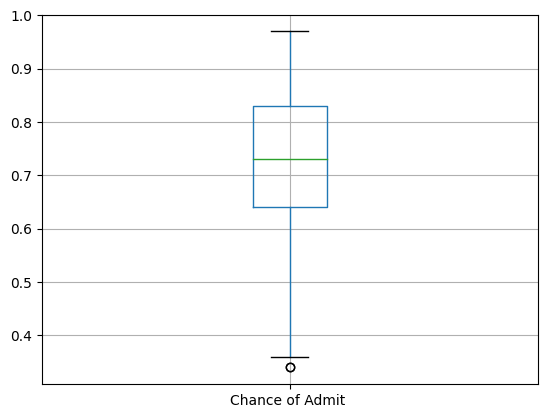

In [ ]:
# Finding if there are any outliers in Chances of Admission column
adm.boxplot(column=['Chance of Admit '])

<Axes: >

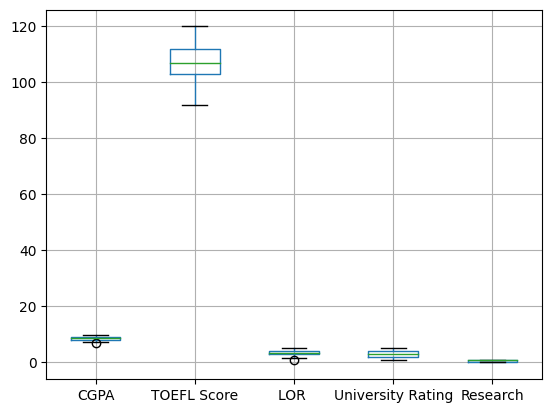

In [ ]:
from tables import Column
adm.boxplot(column=['CGPA','TOEFL Score','LOR ','University Rating','Research'])

<------ The columns 'LOR','CGPA','Chance of Admit' contains outliers--------->

## Removal of Outliers using IQR

In [ ]:
adm1=adm.copy()
adm1.drop(['Serial No.'],axis=1,inplace=True)
# Since Serial No. is irrevelant,it can be removed

In [ ]:
# Calculation of Qartiles for each feature
Q1=adm1.quantile(0.25)
Q3=adm1.quantile(0.75)
IQR=Q3-Q1
IQR

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64

In [ ]:
# Identification of Outliers
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
out=((adm1<lb)|(adm1>ub))
#out_data=adm1[out]
print(out)

     GRE Score  TOEFL Score  University Rating    SOP   LOR    CGPA  Research  \
0        False        False              False  False  False  False     False   
1        False        False              False  False  False  False     False   
2        False        False              False  False  False  False     False   
3        False        False              False  False  False  False     False   
4        False        False              False  False  False  False     False   
..         ...          ...                ...    ...    ...    ...       ...   
395      False        False              False  False  False  False     False   
396      False        False              False  False  False  False     False   
397      False        False              False  False  False  False     False   
398      False        False              False  False  False  False     False   
399      False        False              False  False  False  False     False   

     Chance of Admit   
0  

In [ ]:
# Identify rows with at least one outlier
outlier_rows = out.any(axis=1)

# Display the rows with at least one outlier
outliers_data = adm1[outlier_rows]
print(outliers_data)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
58         300           99                  1  3.0   2.0  6.80         1   
92         298           98                  2  4.0   3.0  8.03         0   
347        299           94                  1  1.0   1.0  7.34         0   
376        297           96                  2  2.5   2.0  7.43         0   

     Chance of Admit   
58               0.36  
92               0.34  
347              0.42  
376              0.34  


## Removal of outliers

In [ ]:
no_out=adm1[~out.any(axis=1)]
no_out

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
# Copying it back to the original one
adm=no_out.copy()
adm

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


## Univariate Analysis

Variables - 'GRE Score'

In [ ]:
adm['GRE Score']

0      337
1      324
2      316
3      322
4      314
      ... 
395    324
396    325
397    330
398    312
399    333
Name: GRE Score, Length: 396, dtype: int64

In [ ]:
adm['GRE Score'].dtypes
# For finding out the data type of 'GRE Score'

dtype('int64')

In [ ]:
adm['GRE Score'].isnull().value_counts
# For finding if there are any null values in GRE Score

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: GRE Score, Length: 396, dtype: bool>

In [ ]:
adm['GRE Score'].isnull().sum()

0

<----------------No Null values in GRE Score----------->

In [ ]:
adm['GRE Score'].min()
# Provides the minimum gre score

290

In [ ]:
adm['GRE Score'].max()
# Provides the maximum GRE Score

340

In [ ]:
adm['GRE Score'].mean()
# Provides the average GRE Score

316.99242424242425

In [ ]:
adm['GRE Score'].mode()

0    312
1    324
Name: GRE Score, dtype: int64

In [ ]:
gre_mode=adm['GRE Score'].mode()

In [ ]:
gre_mode.value_counts()

312    1
324    1
Name: GRE Score, dtype: int64

<---------Insights------>
<----------No mode in GRE Score------>

 TOEFL Score

In [ ]:
adm['TOEFL Score']

0      118
1      107
2      104
3      110
4      103
      ... 
395    110
396    107
397    116
398    103
399    117
Name: TOEFL Score, Length: 396, dtype: int64

In [ ]:
adm['TOEFL Score'].dtypes
# For finding the datatype of TOEFL Score in dataframe

dtype('int64')

In [ ]:
adm['TOEFL Score'].isnull().value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: TOEFL Score, Length: 396, dtype: bool>

In [ ]:
adm['TOEFL Score'].isnull().sum()
# Provides total number of null values if any

0

<-------------No Missing values in TOEFL Score------->

In [ ]:
# For statistical insights
adm['TOEFL Score'].min()



92

In [ ]:
adm['TOEFL Score'].max()

120

In [ ]:
adm['TOEFL Score'].mean()

107.51767676767676

In [ ]:
adm['TOEFL Score'].mode()

0    110
Name: TOEFL Score, dtype: int64

In [ ]:
toe_mode=adm['TOEFL Score'].mode()

In [ ]:
toe_mode.value_counts()

110    1
Name: TOEFL Score, dtype: int64

<---------------------No mode in TOEFL Score------------>

CGPA

In [ ]:
adm['CGPA']

0      9.65
1      8.87
2      8.00
3      8.67
4      8.21
       ... 
395    9.04
396    9.11
397    9.45
398    8.78
399    9.66
Name: CGPA, Length: 396, dtype: float64

In [ ]:
adm['CGPA'].dtypes

dtype('float64')

In [ ]:
adm['CGPA'].isnull().sum()

0

In [ ]:
adm['CGPA'].isnull().value_counts()

False    396
Name: CGPA, dtype: int64

<----------------No Missing values in CGPA------------->

In [ ]:
adm['CGPA'].min()

7.2

In [ ]:
adm['CGPA'].max()

9.92

In [ ]:
adm['CGPA'].mode()

0    8.0
Name: CGPA, dtype: float64

In [ ]:
cgpa_mode=adm['CGPA'].mode()

In [ ]:
cgpa_mode.value_counts()

8.0    1
Name: CGPA, dtype: int64

<-------------------------No Mode for CGPA----------------------->

SOP

In [ ]:
adm['SOP']

0      4.5
1      4.0
2      3.0
3      3.5
4      2.0
      ... 
395    3.5
396    3.0
397    5.0
398    3.5
399    5.0
Name: SOP, Length: 396, dtype: float64

In [ ]:
adm['SOP'].isnull().value_counts()

False    396
Name: SOP, dtype: int64

In [ ]:
adm['SOP'].isnull().sum()

0

<---------------------No Missing Values in SOP---------->

In [ ]:
adm['SOP'].min()

1.0

In [ ]:
adm['SOP'].max()

5.0

In [ ]:
adm['SOP'].mean()

3.407828282828283

LOR

In [ ]:
adm['LOR ']

0      4.5
1      4.5
2      3.5
3      2.5
4      3.0
      ... 
395    3.5
396    3.5
397    4.5
398    4.0
399    4.0
Name: LOR , Length: 396, dtype: float64

In [ ]:
adm['LOR '].isnull().value_counts()

False    396
Name: LOR , dtype: int64

In [ ]:
adm['LOR '].isnull().sum()

0

<-----------------No Missing Values in LOR------------->

In [ ]:
adm['LOR '].min()

1.5

In [ ]:
adm['LOR '].max()

5.0

In [ ]:
adm['LOR '].mean()

3.467171717171717

Research

In [ ]:
adm['Research']

0      1
1      1
2      1
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Research, Length: 396, dtype: int64

In [ ]:
adm['Research'].dtypes

dtype('int64')

In [ ]:
adm['Research'].isnull().value_counts()

False    396
Name: Research, dtype: int64

In [ ]:
adm['Research'].isnull().sum()

0

<-------------No Missing Values in Resesrch--------->

In [ ]:
adm['Research'].unique()
# To find unique values

array([1, 0])

In Research column 1 indicates that student is interested in Research and 0 indicates that ,student is not interested in Research

In [ ]:
adm['Research'].unique().sum()

1

## Bivariate Analysis

## Data Visualizations

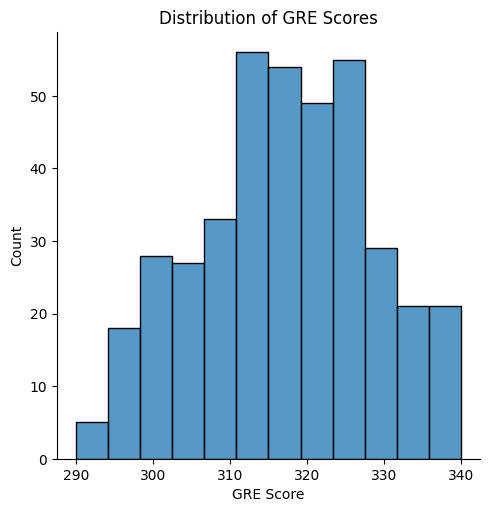

In [ ]:
# For showing GRE Scores
fig=sns.displot(adm['GRE Score'],kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

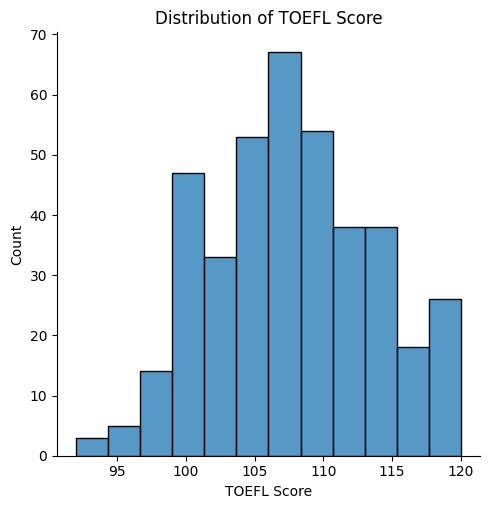

In [ ]:
# TOEFL Score
fig=sns.displot(adm['TOEFL Score'],kde=False)
plt.title("Distribution of TOEFL Score")
plt.show()

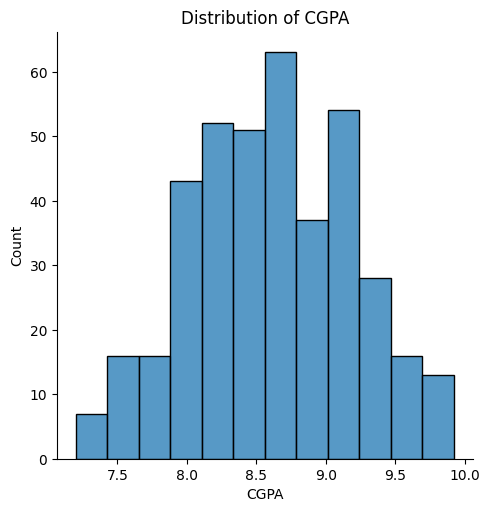

In [ ]:
# Cgpa
fig=sns.displot(adm['CGPA'],kde=False)
plt.title("Distribution of CGPA")
plt.show()

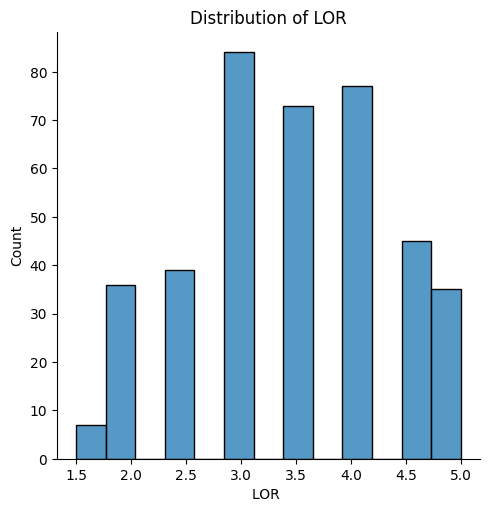

In [ ]:
fig=sns.displot(adm['LOR '],kde=False)
plt.title("Distribution of LOR")
plt.show()

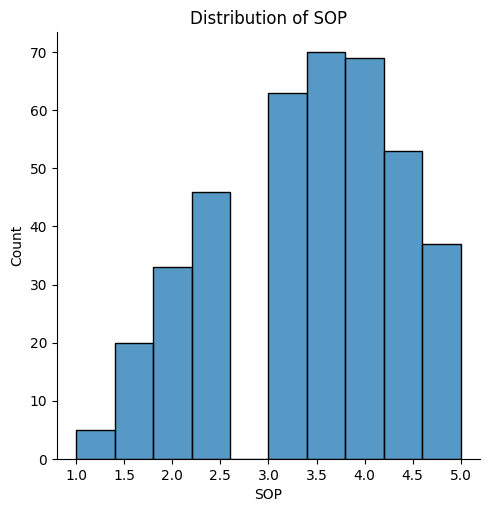

In [ ]:
#SOP
fig=sns.displot(adm['SOP'],kde=False)
plt.title("Distribution of SOP")
plt.show()

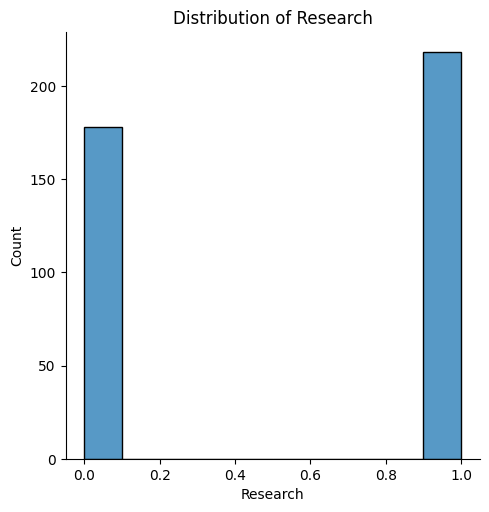

In [ ]:
#Research
fig=sns.displot(adm['Research'],kde=False)
plt.title("Distribution of Research")
plt.show()

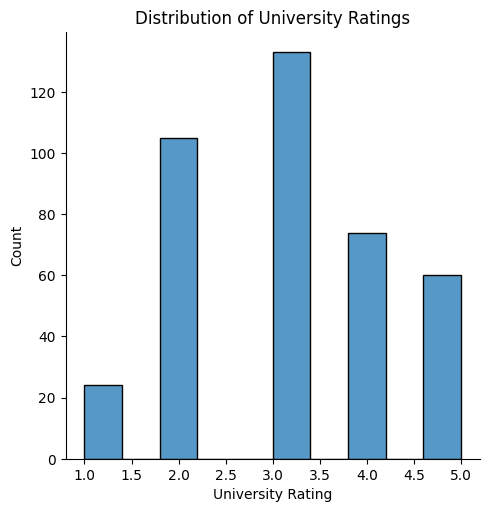

In [ ]:
#University rating
fig=sns.displot(adm['University Rating'],kde=False)
plt.title("Distribution of University Ratings")
plt.show()

# Bivariate Analysis

### Relationship between **GRE** & **CGPA**

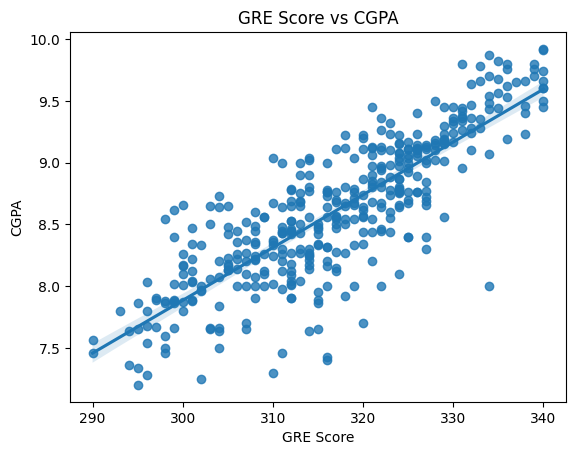

In [ ]:
fig=sns.regplot(x="GRE Score",y="CGPA",data=adm)
plt.title("GRE Score vs CGPA")
plt.show()

<-----------When CGPA is high the GRE Score also tends to be high---------->

## Relationship between GRE Score and TOEFL

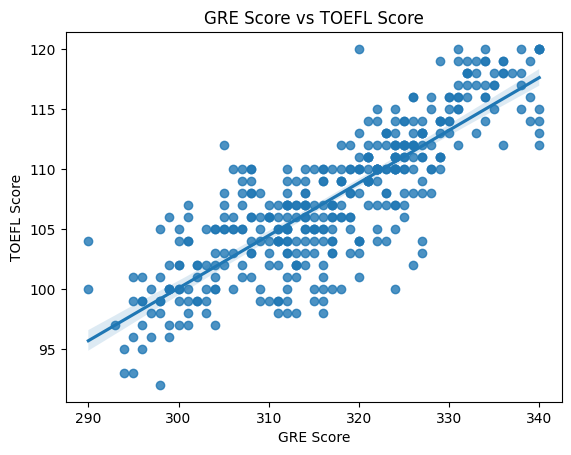

In [ ]:
fig=sns.regplot(x="GRE Score",y="TOEFL Score",data=adm)
plt.title("GRE Score vs TOEFL Score")
plt.show()

<-----------As GRE Score increases the TOEFL score also increases---------->

## Relationship between GRE score and LOR,also show if research=1 or 0

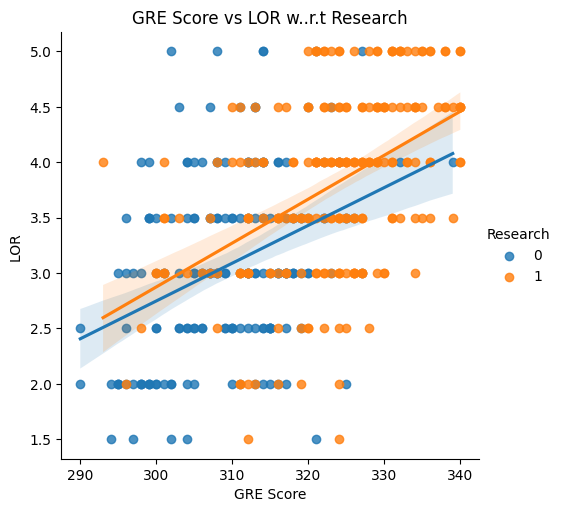

In [ ]:
fig=sns.lmplot(x="GRE Score", y="LOR ", data=adm, hue="Research")
plt.title("GRE Score vs LOR w..r.t Research")
plt.show()
# lmplot used for 2d analysis,takes 3 parameters

<------------CGPA and LOR are not related to each other,they are two independent features------------->

## Relationship between SOP and GRE Score

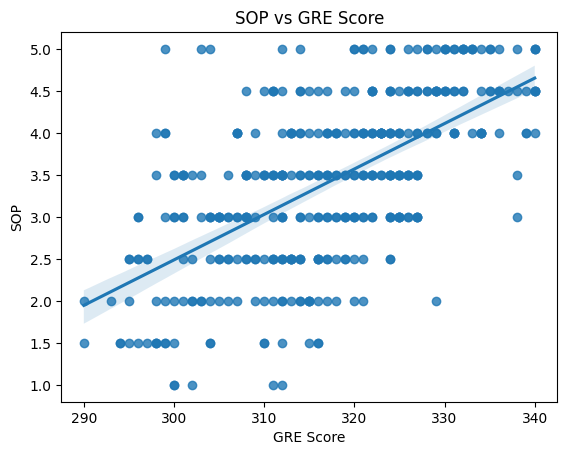

In [ ]:
fig=sns.regplot(x="GRE Score",y="SOP",data=adm)
plt.title("SOP vs GRE Score")
plt.show()

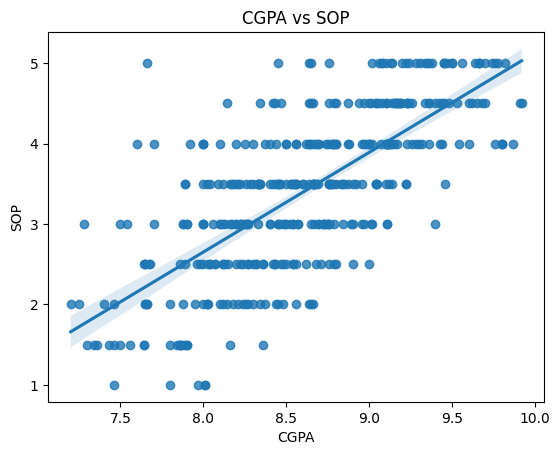

In [ ]:
fig=sns.regplot(x="CGPA",y="SOP",data=adm)
plt.title("CGPA vs SOP")
plt.show()

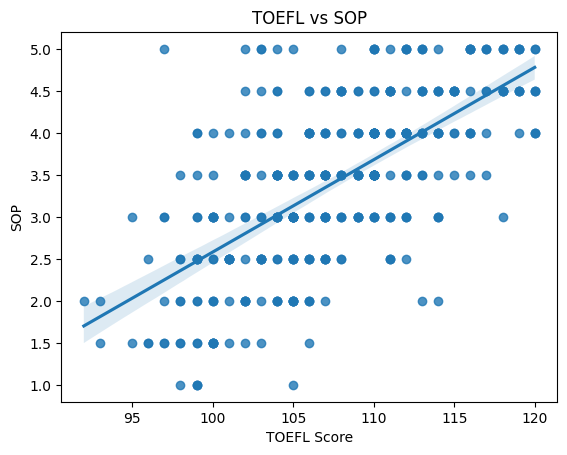

In [ ]:
fig=sns.regplot(x="TOEFL Score",y="SOP",data=adm)
plt.title("TOEFL vs SOP")
plt.show()

# Data Preparation (Split data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x=adm.drop(['Chance of Admit '],axis=1)
y=adm['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,shuffle=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
models=[['DecisionTree:',DecisionTreeRegressor()],
        ['Linear Regression:',LinearRegression()],
['SVM:',SVR()]]
print("Results")

Results


In [ ]:
for m,model in models:
  model=model
  model.fit(x_train,y_train)
  prediction=model.predict(x_test)
  print(m, (np.sqrt(mean_squared_error(y_test,prediction))))

DecisionTree: 0.10003749297138548
Linear Regression: 0.06327660585411048
SVM: 0.07729067721225696


In [ ]:
# Feature
classifier= RandomForestRegressor()
classifier.fit(x,y)
feature_names=x.columns
print(feature_names)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


<------- The suitable model is Decision Tree algorithm------>